<a href="https://colab.research.google.com/github/ukeshbhaal/Final-project-Customer-conversion/blob/main/Copy_of_Final_project_Guvi_Datathon_1_0_Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [2]:
#Loading Dataset
data=pd.read_csv("https://raw.githubusercontent.com/ukeshbhaal/Final-project-Customer-conversion/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [3]:
print(data.tail())
#printing the Tail of the data

       age           job   marital education_qual  call_type  day  mon   dur  \
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
45206          3      unknown  yes  
45207          2      unknown  yes  
45208          5      success  yes  
45209          4      unknown   no  
45210          2        other   no  


In [4]:
print(data.info())
print(data.describe())
data.isna().sum()
#To Check if there is any null values
data.dtypes
# To know the basic info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB
None
                age           day           dur     num_calls
count  45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210     15.806419    258.163080      2.763841
std       10.618762      8.322476    257.527812      3.098021
min       18.000

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


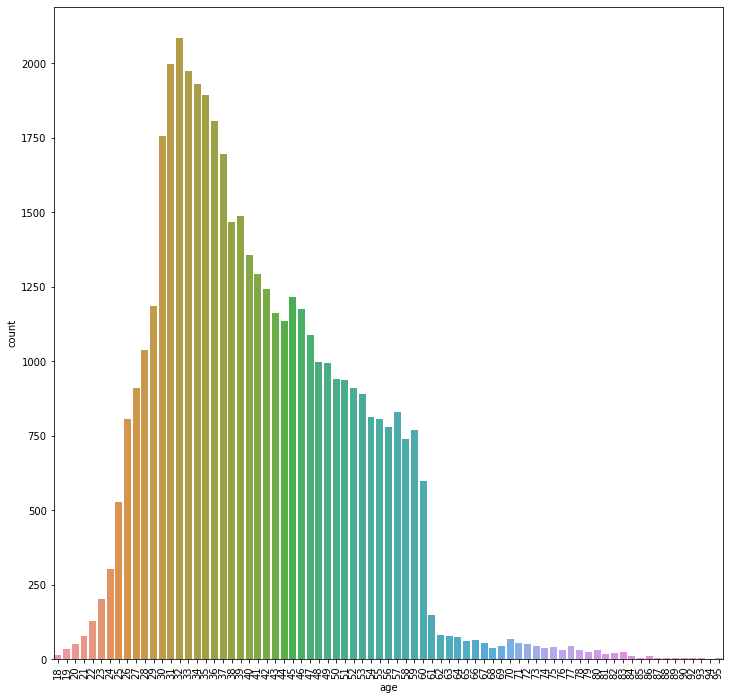

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


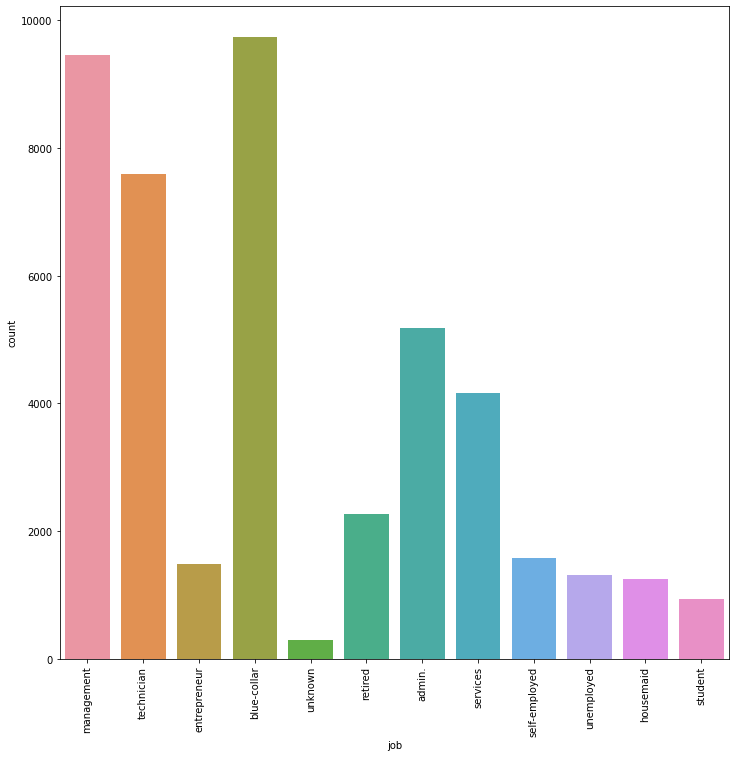

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


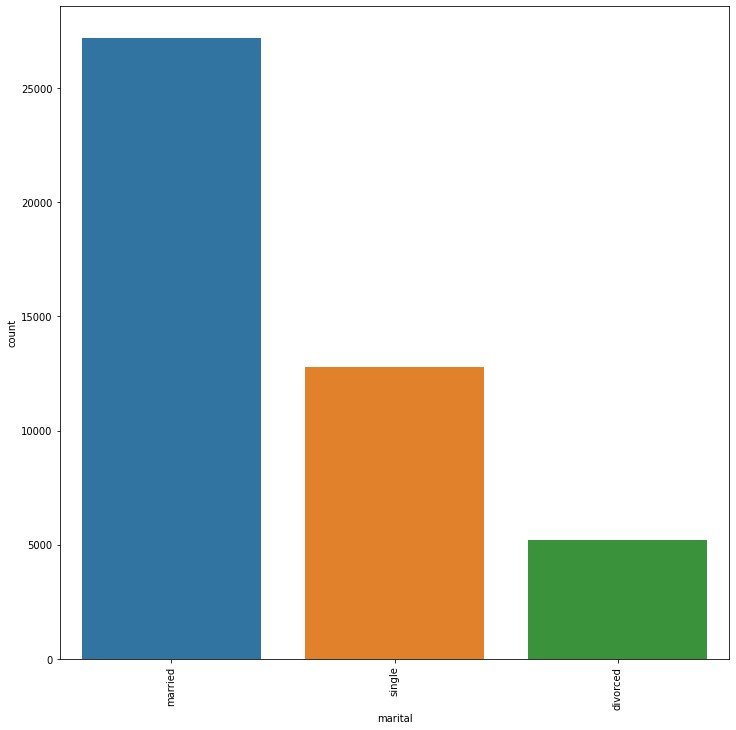

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


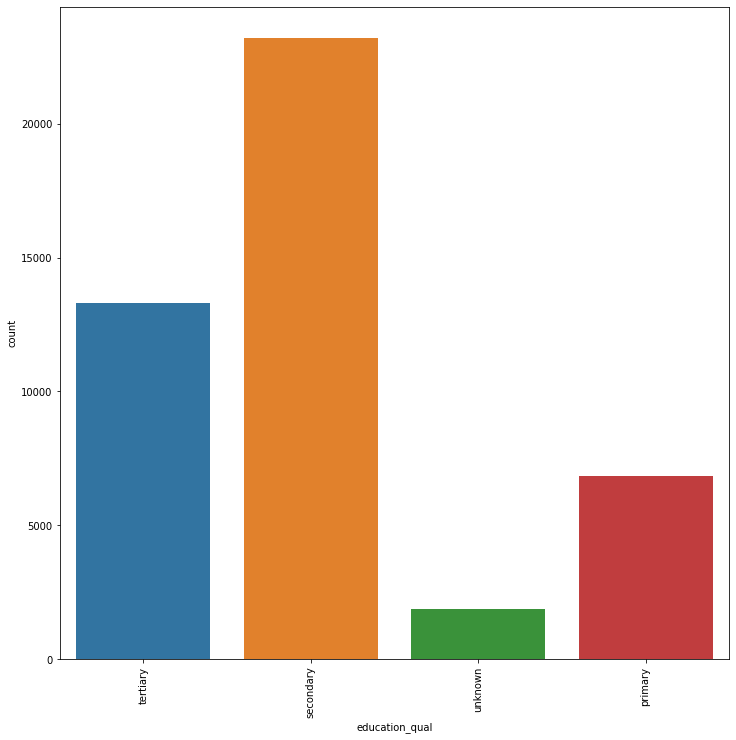

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


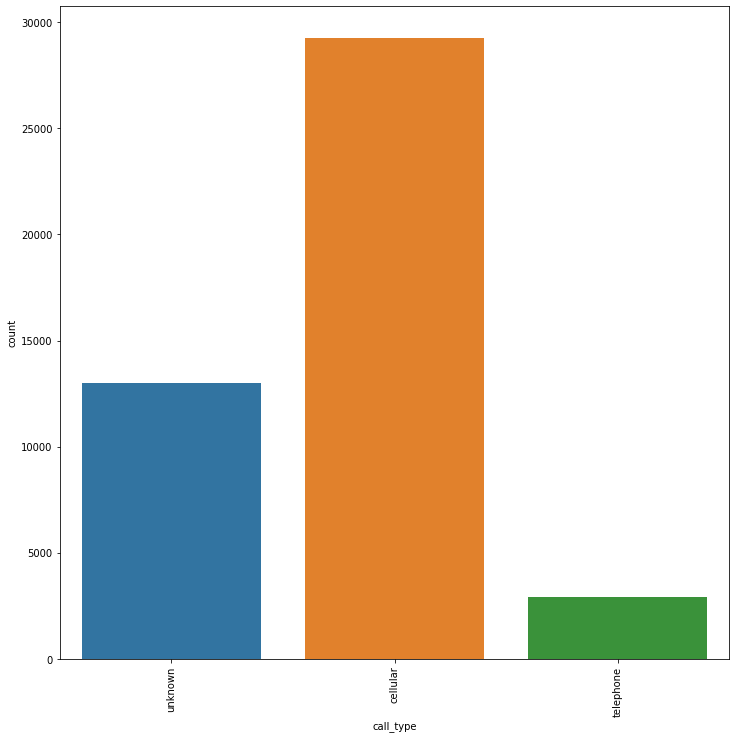

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


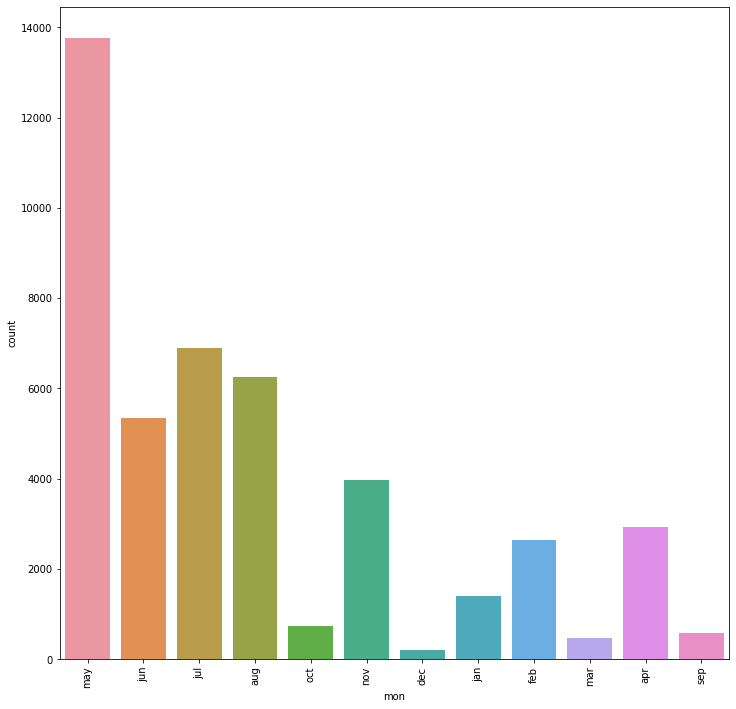

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


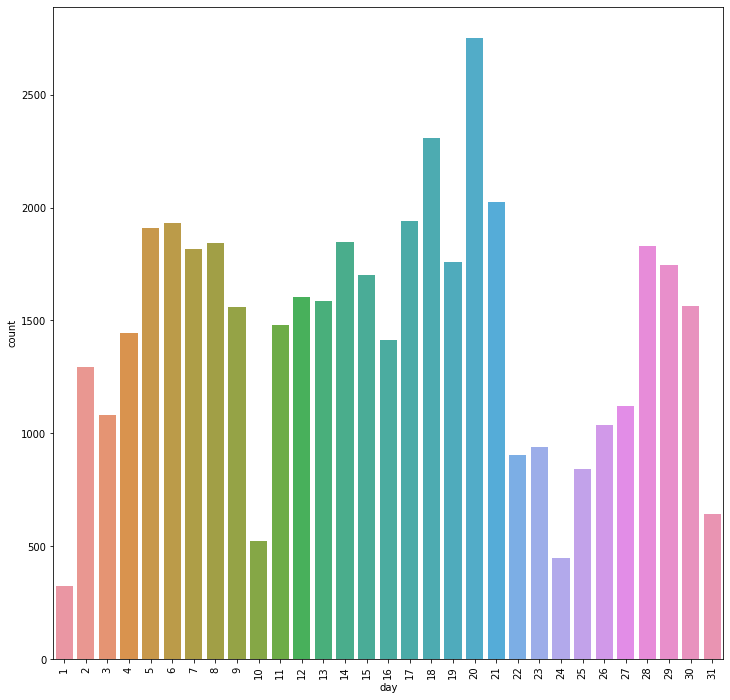

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


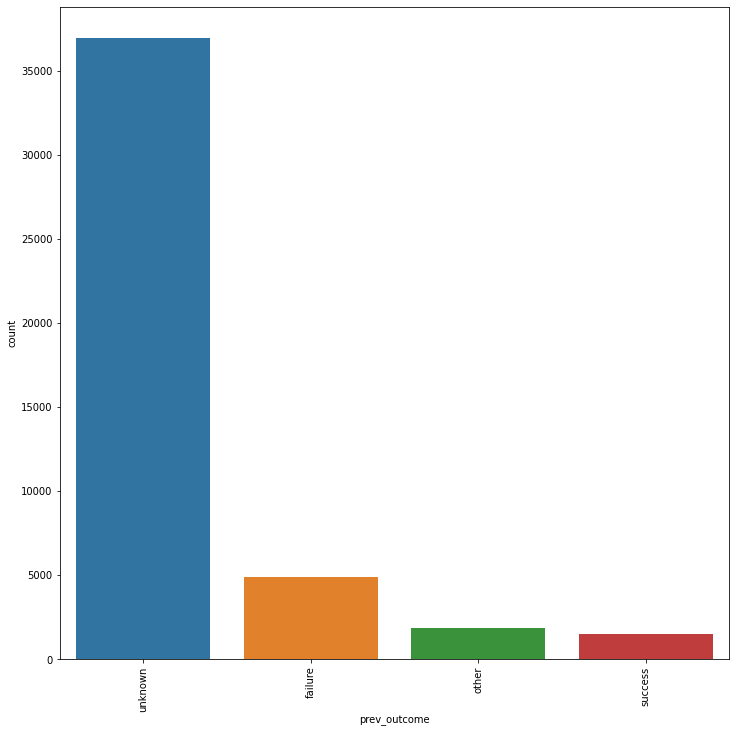

In [5]:
#Visualizing columns - 
Feature = ['age', 'job', 'marital', 'education_qual', 'call_type', 'mon', 'day', 'prev_outcome']
for i in Feature:
  plt.figure(figsize=(12, 12))
  sns.countplot(i, data=data)
  plt.xticks(rotation=90)
  plt.show()

# AS per above graph:
Age : 25 - 60 aged person is preferable 

Job : Management and blue collar job person are more concern about Insurance

Status : Married person are more interested in Insurance 

Month : May month is high customer conversion is happening 

Unknown values are high in Count Vs Prev_ outcome, So we can drop the Pre_outcome column

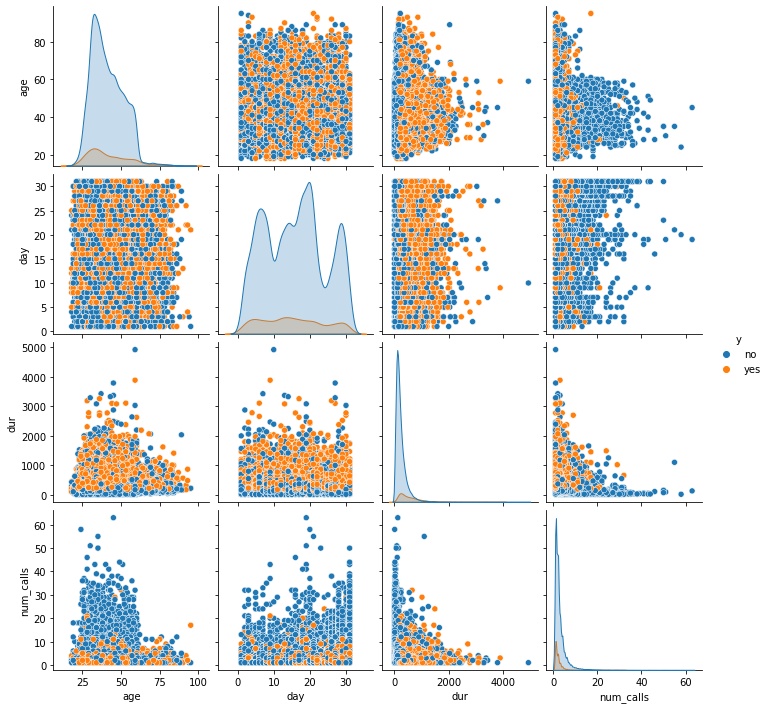

In [6]:
# pairplot with hue Yes/No
sns.pairplot(data, hue ='y')
# to show
plt.show()

Target Column visualization


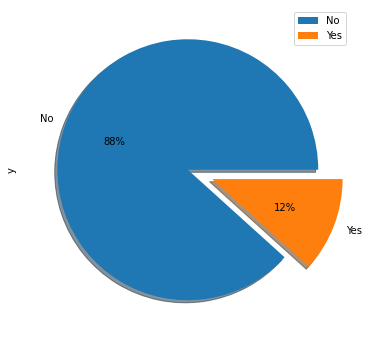

In [7]:
plt.figure(figsize=(9,6))
labels = ['No','Yes']
data['y'].value_counts().plot.pie(shadow=True,
                                labels=labels,
                                autopct='%0.f%%',
                                explode = [0.0,0.2])
plt.legend()
plt.show()

In the given dataset "Customer Conversion is only 12%" - we need to Sampling

In [8]:
ros = RandomOverSampler()

In [9]:
#print(data.apply(lambda col: col.unique()))

#Getting unique values from the dataset

for col in data:
    print(col)
    print(data[col].unique())
    print('\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital
['married' 'single' 'divorced']


education_qual
['tertiary' 'secondary' 'unknown' 'primary']


call_type
['unknown' 'cellular' 'telephone']


day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]


mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


dur
[ 261  151   76 ... 1298 1246 1556]


num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


prev_outcome
['unknown' 'failure' 'other' 'success']


y
['no' 'yes'

In [10]:
#Applying One-Hot Encoding - 
data = pd.get_dummies(data, columns = [ 'call_type'])
print(data)

       age           job   marital education_qual  day  mon   dur  num_calls  \
0       58    management   married       tertiary    5  may   261          1   
1       44    technician    single      secondary    5  may   151          1   
2       33  entrepreneur   married      secondary    5  may    76          1   
3       47   blue-collar   married        unknown    5  may    92          1   
4       33       unknown    single        unknown    5  may   198          1   
...    ...           ...       ...            ...  ...  ...   ...        ...   
45206   51    technician   married       tertiary   17  nov   977          3   
45207   71       retired  divorced        primary   17  nov   456          2   
45208   72       retired   married      secondary   17  nov  1127          5   
45209   57   blue-collar   married      secondary   17  nov   508          4   
45210   37  entrepreneur   married      secondary   17  nov   361          2   

      prev_outcome    y  call_type_cell

In [11]:
#We are converting unknown into Not Known since label Enconder creating the order - To set unknow as 0 value
data['education_qual'] = data['education_qual'] .replace('unknown','not known')
print(data)

       age           job   marital education_qual  day  mon   dur  num_calls  \
0       58    management   married       tertiary    5  may   261          1   
1       44    technician    single      secondary    5  may   151          1   
2       33  entrepreneur   married      secondary    5  may    76          1   
3       47   blue-collar   married      not known    5  may    92          1   
4       33       unknown    single      not known    5  may   198          1   
...    ...           ...       ...            ...  ...  ...   ...        ...   
45206   51    technician   married       tertiary   17  nov   977          3   
45207   71       retired  divorced        primary   17  nov   456          2   
45208   72       retired   married      secondary   17  nov  1127          5   
45209   57   blue-collar   married      secondary   17  nov   508          4   
45210   37  entrepreneur   married      secondary   17  nov   361          2   

      prev_outcome    y  call_type_cell

Encoding

In [12]:
#Encoding - Educational Qualification 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['education_qual','marital','job','mon']
# We can also Encode labels of multiple columns at once like - cols=['Educational qualification','Gender','etc'] like that- but here
data[cols] = data[cols].apply(le.fit_transform)
#print(one_hot_encoded_data)
data['y'] = data['y'].map({'no': 0, 'yes': 1})
#Changing the Y feature into numerical column [0,1]


# Get the list of all column names from headers
column_headers = list(data.columns.values)
#print("The Column Header :", column_headers)

In [13]:
data.dtypes

age                     int64
job                     int64
marital                 int64
education_qual          int64
day                     int64
mon                     int64
dur                     int64
num_calls               int64
prev_outcome           object
y                       int64
call_type_cellular      uint8
call_type_telephone     uint8
call_type_unknown       uint8
dtype: object

In [14]:
#Since Unknow values are high in Pre_outcome - we are dropping 
data.drop("prev_outcome",  axis = 1, inplace = True)

In [15]:
data.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown
0,58,4,1,3,5,8,261,1,0,0,0,1
1,44,9,2,2,5,8,151,1,0,0,0,1
2,33,2,1,2,5,8,76,1,0,0,0,1
3,47,1,1,0,5,8,92,1,0,0,0,1
4,33,11,2,0,5,8,198,1,0,0,0,1


In [16]:
#To check the count value of Y
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

corrcoef() method from NumPy

In [17]:
data.corr()

,age,job,marital,education_qual,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown
age,1.000000,-0.021868,-0.403240,-0.173615,-0.009120,-0.042357,-0.004648,0.004760,0.025155,-0.068375,0.170349,-0.020132
job,-0.021868,1.000000,0.062045,0.135898,0.022856,-0.092870,0.004744,0.006839,0.040438,0.077792,-0.002573,-0.080668
marital,-0.403240,0.062045,1.000000,0.095415,-0.005261,-0.006991,0.011852,-0.008994,0.045588,0.042114,-0.020524,-0.033310
education_qual,-0.173615,0.135898,0.095415,1.000000,0.021661,-0.070679,0.002554,0.000194,0.051341,0.161671,-0.075152,-0.129842
day,-0.009120,0.022856,-0.005261,0.021661,1.000000,-0.006028,-0.030206,0.162490,-0.028348,0.020186,0.023652,-0.034103
mon,-0.042357,-0.092870,-0.006991,-0.070679,-0.006028,1.000000,0.006314,-0.110031,-0.024471,-0.338259,-0.004616,0.359322
dur,-0.004648,0.004744,0.011852,0.002554,-0.030206,0.006314,1.000000,-0.084570,0.394521,0.025543,-0.023201,-0.014379
num_calls,0.004760,0.006839,-0.008994,0.000194,0.162490,-0.110031,-0.084570,1.000000,-0.073172,-0.032271,0.053895,0.004853
y,0.025155,0.040438,0.045588,0.051341,-0.028348,-0.024471,0.394521,-0.073172,1.000000,0.135873,0.014042,-0.150935
call_type_cellular,-0.068375,0.077792,0.042114,0.161671,0.020186,-0.338259,0.025543,-0.032271,0.135873,1.000000,-0.355403,-0.862398


In [18]:
X = data.drop("y", axis = 1)
y = data['y'].values
print(X,y)

       age  job  marital  education_qual  day  mon   dur  num_calls  \
0       58    4        1               3    5    8   261          1   
1       44    9        2               2    5    8   151          1   
2       33    2        1               2    5    8    76          1   
3       47    1        1               0    5    8    92          1   
4       33   11        2               0    5    8   198          1   
...    ...  ...      ...             ...  ...  ...   ...        ...   
45206   51    9        1               3   17    9   977          3   
45207   71    5        0               1   17    9   456          2   
45208   72    5        1               2   17    9  1127          5   
45209   57    1        1               2   17    9   508          4   
45210   37    2        1               2   17    9   361          2   

       call_type_cellular  call_type_telephone  call_type_unknown  
0                       0                    0                  1  
1          

In [19]:
X , y = ros.fit_resample(X, y)
print(Counter(y))

Counter({0: 39922, 1: 39922})


In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 4)

#Splitting Data


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)
print("\n x_train\n",x_train,"\n x_test\n",x_test)
print("\n y_train\n",y_train,"\n y_test\n",y_test)


 x_train
 [[ 0.7365085   1.39267536 -0.32544657 ...  0.6131013  -0.26918565
  -0.50878882]
 [-1.02478994  0.46554113  1.27120402 ...  0.6131013  -0.26918565
  -0.50878882]
 [-0.60543317 -1.38872734 -0.32544657 ...  0.6131013  -0.26918565
  -0.50878882]
 ...
 [-0.01833368 -0.15254836 -0.32544657 ...  0.6131013  -0.26918565
  -0.50878882]
 [ 1.07199392  0.77458587 -0.32544657 ... -1.63105183 -0.26918565
   1.96545197]
 [-0.60543317  0.46554113  1.27120402 ...  0.6131013  -0.26918565
  -0.50878882]] 
 x_test
 [[-0.93618436  1.38952257 -0.32313838 ...  0.61678908 -0.27611364
  -0.50741013]
 [ 0.64609842  0.77304479  1.26988833 ...  0.61678908 -0.27611364
  -0.50741013]
 [ 0.72937646  1.38952257 -1.91616508 ...  0.61678908 -0.27611364
  -0.50741013]
 ...
 [-0.35323807 -1.38462744  1.26988833 ...  0.61678908 -0.27611364
  -0.50741013]
 [ 1.14576666 -0.15167188 -0.32313838 ...  0.61678908 -0.27611364
  -0.50741013]
 [ 0.89593254 -0.15167188 -0.32313838 ...  0.61678908 -0.27611364
  -0.507410

**Random Forest Classifier**

Random forest is a supervised learning algorithm that uses an ensemble learning method for classification and regression. Random forest is a bagging technique and not a boosting technique. The trees in random forests run in parallel, meaning is no interaction between these trees while building the trees.

In [22]:
from sklearn.ensemble import RandomForestClassifier
re=RandomForestClassifier(n_estimators=50,random_state=1)
rf=re.fit(x_train,y_train)
RandomForestClassifier(n_estimators=50, random_state=1)


RandomForestClassifier(n_estimators=50, random_state=1)

In [23]:
y_pred=re.predict(x_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03451730875206653
Mean Squared Error: 0.03451730875206653
Root Mean Squared Error: 0.18578834396179575


In [25]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9979
           1       0.94      1.00      0.97      9982

    accuracy                           0.97     19961
   macro avg       0.97      0.97      0.97     19961
weighted avg       0.97      0.97      0.97     19961

[[9307  672]
 [  17 9965]]


In [26]:
a_s=accuracy_score(y_test, y_pred)*100
a_s

96.54826912479335

[[9307  672]
 [  17 9965]]


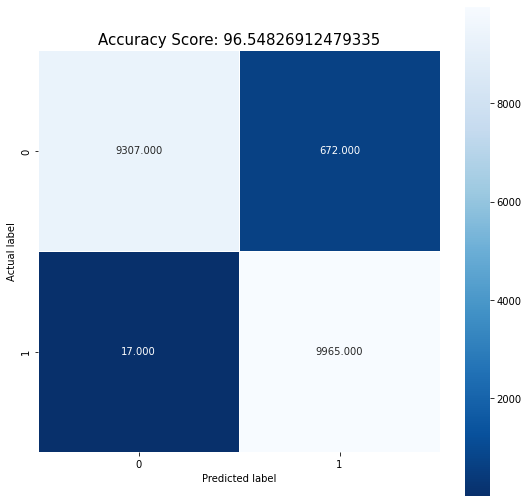

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(a_s)
plt.title(all_sample_title, size = 15);

In [28]:
x_knn = data.drop("y", axis = 1)
y_knn = data['y'].values
print(x_knn,y_knn)

       age  job  marital  education_qual  day  mon   dur  num_calls  \
0       58    4        1               3    5    8   261          1   
1       44    9        2               2    5    8   151          1   
2       33    2        1               2    5    8    76          1   
3       47    1        1               0    5    8    92          1   
4       33   11        2               0    5    8   198          1   
...    ...  ...      ...             ...  ...  ...   ...        ...   
45206   51    9        1               3   17    9   977          3   
45207   71    5        0               1   17    9   456          2   
45208   72    5        1               2   17    9  1127          5   
45209   57    1        1               2   17    9   508          4   
45210   37    2        1               2   17    9   361          2   

       call_type_cellular  call_type_telephone  call_type_unknown  
0                       0                    0                  1  
1          

In [29]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, random_state = 4)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([   ('std_scalar', StandardScaler())])
x_train_knn = pipeline.fit_transform(x_train_knn)
x_test_knn = pipeline.fit_transform(x_test_knn)
print("\n x_train\n",x_train_knn,"\n x_test\n",x_test_knn)
print("\n y_train\n",y_train_knn,"\n y_test\n",y_test_knn)


 x_train
 [[ 0.09854246  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [-0.46649987  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [-0.1839787  -0.10504666  1.36081758 ... -1.35711828 -0.26250936
   1.57453833]
 ...
 [-0.74902104 -1.02212242 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [ 1.60532203 -0.10504666 -0.27602536 ... -1.35711828 -0.26250936
   1.57453833]
 [ 0.28688991  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]] 
 x_test
 [[ 0.67015703 -1.32090493 -0.27499418 ...  0.73922228 -0.26083259
  -0.63857014]
 [ 0.48180451  1.42580294 -0.27499418 ... -1.35277308 -0.26083259
   1.56599868]
 [ 0.48180451  0.81542342  1.39163273 ...  0.73922228 -0.26083259
  -0.63857014]
 ...
 [-1.1191919   1.12061318  1.39163273 ...  0.73922228 -0.26083259
  -0.63857014]
 [-0.55413434  1.12061318  1.39163273 ... -1.35277308  3.83387677
  -0.63857014]
 [ 1.04686207 -1.32090493 -0.27499418 ...  0.73922228 -0.26083259
  -0.638570

**KN Neighbors Classifier**

KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified. KNN classifies the new data points based on the similarity measure of the earlier stored data points.

In [31]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [32]:
k5=knn5.fit(x_train_knn, y_train_knn)
knn1.fit(x_train_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred_5 = knn5.predict(x_test_knn)
y_pred_1 = knn1.predict(x_test_knn)

In [36]:
from sklearn.metrics import accuracy_score
a_s_5=accuracy_score(y_test_knn, y_pred_5)*100
a_s_1=accuracy_score(y_test_knn, y_pred_1)*100
print("Accuracy with k=5", (a_s_5))
print("Accuracy with k=1", (a_s_1))

Accuracy with k=5 89.1090860833407
Accuracy with k=1 87.75546315137575


[[9416  636]
 [ 748  503]]


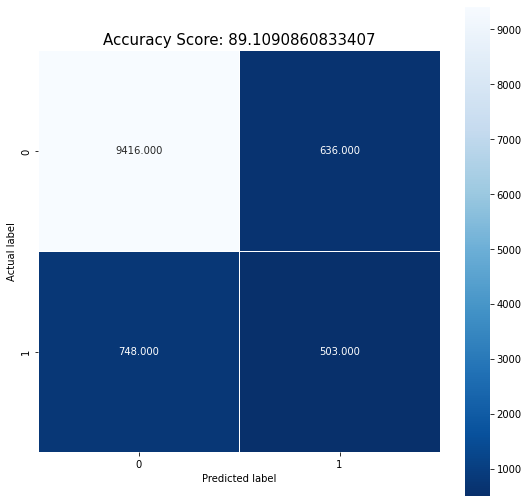

In [37]:
from sklearn import metrics
cm_5 = metrics.confusion_matrix(y_test_knn, y_pred_1)
print(cm_5)
plt.figure(figsize=(9,9))
sns.heatmap(cm_5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(a_s_5)
plt.title(all_sample_title, size = 15);

In [38]:
from sklearn import metrics
cm_1 = metrics.confusion_matrix(y_test_knn, y_pred_1)
print(cm_1)

[[9416  636]
 [ 748  503]]


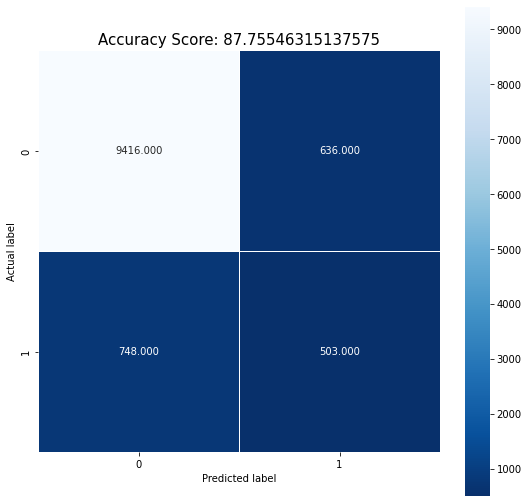

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(a_s_1)
plt.title(all_sample_title, size = 15);

KNN 5 giving more accuracy score is more than KNN 1

In [40]:
x_log_res = data.drop("y", axis = 1)
y_log_res = data['y'].values
print(x_log_res,y_log_res)

       age  job  marital  education_qual  day  mon   dur  num_calls  \
0       58    4        1               3    5    8   261          1   
1       44    9        2               2    5    8   151          1   
2       33    2        1               2    5    8    76          1   
3       47    1        1               0    5    8    92          1   
4       33   11        2               0    5    8   198          1   
...    ...  ...      ...             ...  ...  ...   ...        ...   
45206   51    9        1               3   17    9   977          3   
45207   71    5        0               1   17    9   456          2   
45208   72    5        1               2   17    9  1127          5   
45209   57    1        1               2   17    9   508          4   
45210   37    2        1               2   17    9   361          2   

       call_type_cellular  call_type_telephone  call_type_unknown  
0                       0                    0                  1  
1          

In [41]:
x_train_log_res, x_test_log_res, y_train_log_res, y_test_log_res = train_test_split(x_log_res, y_log_res, random_state = 4)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([   ('std_scalar', StandardScaler())])
x_train_log_res = pipeline.fit_transform(x_train_log_res)
x_test_log_res = pipeline.fit_transform(x_test_log_res)
print("\n x_train\n",x_train_log_res,"\n x_test\n",x_test_log_res)
print("\n y_train\n",y_train_log_res,"\n y_test\n",y_test_log_res)


 x_train
 [[ 0.09854246  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [-0.46649987  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [-0.1839787  -0.10504666  1.36081758 ... -1.35711828 -0.26250936
   1.57453833]
 ...
 [-0.74902104 -1.02212242 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]
 [ 1.60532203 -0.10504666 -0.27602536 ... -1.35711828 -0.26250936
   1.57453833]
 [ 0.28688991  1.42341293 -0.27602536 ...  0.73685545 -0.26250936
  -0.6351068 ]] 
 x_test
 [[ 0.67015703 -1.32090493 -0.27499418 ...  0.73922228 -0.26083259
  -0.63857014]
 [ 0.48180451  1.42580294 -0.27499418 ... -1.35277308 -0.26083259
   1.56599868]
 [ 0.48180451  0.81542342  1.39163273 ...  0.73922228 -0.26083259
  -0.63857014]
 ...
 [-1.1191919   1.12061318  1.39163273 ...  0.73922228 -0.26083259
  -0.63857014]
 [-0.55413434  1.12061318  1.39163273 ... -1.35277308  3.83387677
  -0.63857014]
 [ 1.04686207 -1.32090493 -0.27499418 ...  0.73922228 -0.26083259
  -0.638570

**Logistic** **Regression**

Logistic regression is a Machine Learning classification algorithm that is used to predict the probability of certain classes based on some dependent variables. In short, the logistic regression model computes a sum of the input features (in most cases, there is a bias term), and calculates the logistic of the result.

In [42]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
l=logisticRegr.fit(x_train_log_res, y_train_log_res)

In [43]:

y_pred_log_res = logisticRegr.predict(x_test_log_res)
x_test_log_res

array([[ 0.67015703, -1.32090493, -0.27499418, ...,  0.73922228,
        -0.26083259, -0.63857014],
       [ 0.48180451,  1.42580294, -0.27499418, ..., -1.35277308,
        -0.26083259,  1.56599868],
       [ 0.48180451,  0.81542342,  1.39163273, ...,  0.73922228,
        -0.26083259, -0.63857014],
       ...,
       [-1.1191919 ,  1.12061318,  1.39163273, ...,  0.73922228,
        -0.26083259, -0.63857014],
       [-0.55413434,  1.12061318,  1.39163273, ..., -1.35277308,
         3.83387677, -0.63857014],
       [ 1.04686207, -1.32090493, -0.27499418, ...,  0.73922228,
        -0.26083259, -0.63857014]])

In [44]:
logisticRegr.score(x_test_log_res, y_test_log_res)*100

89.48066884897815

In [45]:
CM_log_res = confusion_matrix(y_test_log_res, y_pred_log_res)
CM_log_res

array([[9864,  188],
       [1001,  250]])

Text(33.0, 0.5, 'Truth')

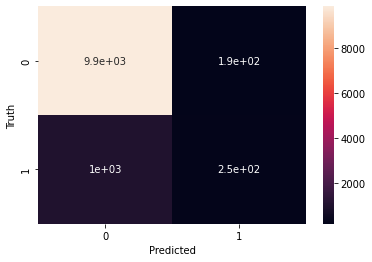

In [46]:
sns.heatmap(CM_log_res, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

ROC **Curve**

AUC: Area Under the ROC Curve

AUC provides an aggregate measure of performance across all possible classification thresholds.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [49]:
from sklearn.metrics import roc_curve

Result = l
Result_Knn = k5
Result_random =rf

pred_prob1 = Result.predict_proba(x_test_log_res)
pred_prob2 = Result_Knn.predict_proba(x_test_knn)
pred_prob3 = Result_random.predict_proba(x_test)

#ROC curve for classifiers
fpr1, tpr1, thresh1 = roc_curve(y_test_log_res, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_knn, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test_log_res, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_knn, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
 
print("Logistic Regression Score:", auc_score1)
print("KNN AUC Score:", auc_score2) 
print("Random Forest AUC Score:", auc_score3)


Logistic Regression Score: 0.8499180758854914
KNN AUC Score: 0.8090638909485225
Random Forest AUC Score: 0.997831701833317


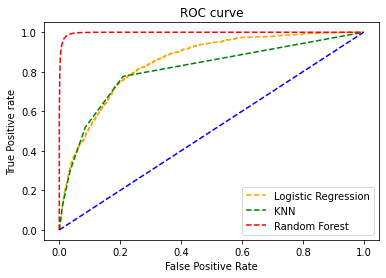

In [48]:
#Plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Random Forest is make more accuracy with above dataset process